# Manuever to Another Orbit
## Given: 
Spacecraft in orbit around the Earth with paramters: $e = 0.75$, $a = 4.5 * r_{Earth}$ wants to go into an orbit with $r_p = 2R_{Earth}$, $r_a = 6 * R_{Earth}$ and with a $35^o$ perigee advance.

## Find
a) At $\theta^*$ the $r^-_1$, $v^-_1$, and $\gamma^-_1$ at manuever point.

b) $|\Delta V|$, $\alpha$, $\beta$. Choose manuever point by lowest $\Delta v$. What are the $v^+$ and $\gamma^+$?

c) Plot it


In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
miu = SS.loc['Earth', 'miu']

e_1 = 0.75
a_1 = 4.5 * SS.loc['Earth', 'r']

rp_2 = 2*SS.loc['Earth', 'r']
ra_2 = 6*SS.loc['Earth', 'r']

del_omega = kp.angle.degree(35)

### Part a)

In [3]:
p_1 = kp.p_a_e(a_1, e_1)
h_1 = kp.h_miu_p(miu, p_1)

a_2 = kp.a_rp_ra(rp_2, ra_2)
e_2 = kp.e_rp_a(rp_2, a_2)
p_2 = kp.p_a_e(a_2, e_2)
h_2 = kp.h_miu_p(miu, p_2)

thst_int_1 = kp.thst_int.thst_int(p_1, p_2, e_1, e_2, del_omega.rad)
r_mags_1 = np.array([])
for thst in thst_int_1.rad:
    print('True anomaly at first orbit (deg):' , round(np.rad2deg(thst),2))
    
    r_1 = kp.distance.keplar_r(p_1, e_1, thst)
    r_mags_1 = np.append(r_mags_1, r_1.mag)
    v_1_mag = kp.velocity.v_a_miu_r(a_1, miu, r_1.mag)
    gamma_1 = kp.gamma.gamma_h_r_v_thst(h_1, r_1.mag, v_1_mag, thst)
    v_1 = kp.velocity.v_gamma(v_1_mag, gamma_1.rad, thst)
    
    print('Location and Distance (km)')
    print(r_1.print_table())
    print('\n Velocity (km/s)')
    print(v_1.print_table())
    print('\n Flight Path angle')
    print(gamma_1.__dict__)    
    print('\n')




True anomaly at first orbit (deg): 110.34
Location and Distance (km)
         per        rad        eci        mag
0  -5904.549  16985.367  -5904.549  16985.367
1  15926.048      0.000  15926.048  16985.367
2      0.000      0.000      0.000  16985.367

 Velocity (km/s)
     per    rad    eci    mag
0 -5.283  3.962 -5.283  5.749
1  2.267  4.165  2.267  5.749
2  0.000  0.000  0.000  5.749

 Flight Path angle
{'deg': 43.568178778184254, 'rad': 0.7604081687768355}


True anomaly at first orbit (deg): 206.94
Location and Distance (km)
         per        rad        eci        mag
0 -33782.963  37894.178 -33782.963  37894.178
1 -17166.249      0.000 -17166.249  37894.178
2      0.000      0.000      0.000  37894.178

 Velocity (km/s)
     per    rad    eci    mag
0  2.552 -1.914  2.552  2.674
1 -0.797  1.867 -0.797  2.674
2  0.000  0.000  0.000  2.674

 Flight Path angle
{'deg': 314.2842098204877, 'rad': 5.485294248396207}




In [4]:
thst_int_2 = kp.thst.thst_p_e_r(p_2, e_2, r_mags_1)

for thst in thst_int_2.rad:
    print('True anomaly at second orbit (deg):' , round(np.rad2deg(thst),2))
    
    r_2 = kp.distance.keplar_r(p_2, e_2, thst, omega=del_omega.rad)
    v_2_mag = kp.velocity.v_a_miu_r(a_2, miu, r_2.mag)
    gamma_2 = kp.gamma.gamma_h_r_v_thst(h_2, r_2.mag, v_2_mag, thst)
    v_2 = kp.velocity.v_gamma(v_2_mag, gamma_2.rad, thst, omega=del_omega.rad)
    
    print('Location and Distance (km)')
    print(r_2.print_table())
    print('\n Velocity (km/s)')
    print(v_2.print_table())
    print('\n Flight Path angle')
    print(gamma_2.__dict__)
    print('\n')

True anomaly at second orbit (deg): 75.34
Location and Distance (km)
         per        rad        eci        mag
0   4298.082  16985.367  -5904.549  16985.367
1  16432.564      0.000  15926.048  16985.367
2      0.000      0.000      0.000  16985.367

 Velocity (km/s)
     per    rad    eci    mag
0 -4.416  2.208 -5.588  5.596
1  3.437  5.142  0.283  5.596
2  0.000  0.000  0.000  5.596

 Flight Path angle
{'deg': 23.238603101018267, 'rad': 0.4055901376769332}


True anomaly at second orbit (deg): 171.94
Location and Distance (km)
         per        rad        eci        mag
0 -37519.539  37894.178 -33782.963  37894.178
1   5315.344      0.000 -17166.249  37894.178
2      0.000      0.000      0.000  37894.178

 Velocity (km/s)
     per    rad    eci    mag
0 -0.640  0.320  0.759  2.327
1 -2.237  2.305 -2.200  2.327
2  0.000  0.000  0.000  2.327

 Flight Path angle
{'deg': 7.907501127671754, 'rad': 0.1380119302830366}




### Part b)

In [5]:
r_1 = kp.distance.keplar_r(p_1, e_1, thst_int_1.rad)
v_1_mag = kp.velocity.v_a_miu_r(a_1, miu, r_1.mag)
gamma_1 = kp.gamma.gamma_h_r_v_thst(h_1, r_1.mag, v_1_mag, thst_int_1.rad)
v_11 = kp.velocity.v_gamma(v_1_mag[0], gamma_1.rad[0], thst_int_1.rad[0])
v_12 = kp.velocity.v_gamma(v_1_mag[1], gamma_1.rad[1], thst_int_1.rad[1])

r_2 = kp.distance.keplar_r(p_1, e_1, thst_int_1.rad, omega=del_omega.rad)
v_2_mag = kp.velocity.v_a_miu_r(a_2, miu, r_2.mag)
gamma_2 = kp.gamma.gamma_h_r_v_thst(h_2, r_2.mag, v_2_mag, thst_int_2.rad)
v_21 = kp.velocity.v_gamma(v_2_mag[0], gamma_2.rad[0], thst_int_2.rad[0], omega=del_omega.rad)
v_22 = kp.velocity.v_gamma(v_2_mag[1], gamma_2.rad[1], thst_int_2.rad[1], omega=del_omega.rad)

delV_1 = v_21 - v_11
beta_1 = kp.beta.beta_v1_v2_delV_gamma1_gamma2(v_11.mag, v_21.mag, delV_1.mag, gamma_1.rad[0], gamma_2.rad[0])
alpha_1 = kp.alpha.alpha_v1rad_delVrad(v_11.rad, delV_1.rad)

delV_2 = v_22 - v_12
beta_2 = kp.beta.beta_v1_v2_delV_gamma1_gamma2(v_12.mag, v_22.mag, delV_2.mag, gamma_1.rad[1], gamma_2.rad[1])
alpha_2 = kp.alpha.alpha_v1rad_delVrad(v_12.rad, delV_2.rad)

print('DeltaV at first position (km/s):\n',delV_1.print_table())
print('Beta (deg):', round(beta_1.deg,2))
print('Alpha (deg):', round(alpha_1.deg,2))

print('\n DeltaV at second position (km/s):\n', delV_2.print_table())
print('Beta (deg):', round(beta_2.deg,2))
print('Alpha (deg):', round(alpha_2.deg,2))

if delV_1.mag < delV_2.mag:
    print('\n\nManuever 1 is better.')
    manuever_i = 0
else:
    print('\n\nManuever 1 is better.')
    manuever_i = 1

DeltaV at first position (km/s):
      per    rad    eci    mag
0  0.867 -1.754 -0.306  2.008
1  1.170  0.976 -1.984  2.008
2  0.000  0.000  0.000  2.008
Beta (deg): 284.47
Alpha (deg): 255.53

 DeltaV at second position (km/s):
      per    rad    eci    mag
0 -3.192  2.234 -1.794  2.277
1 -1.440  0.438 -1.402  2.277
2  0.000  0.000  0.000  2.277
Beta (deg): 55.37
Alpha (deg): 124.63


Manuever 1 is better.


### Part c)

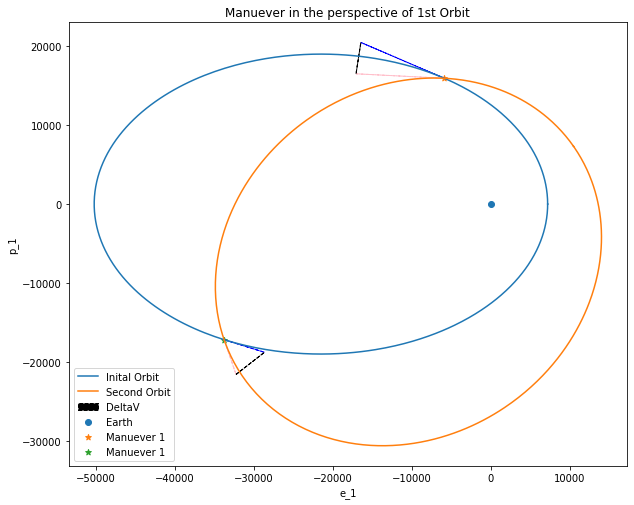

In [8]:
thst_traj = kp.thst.degree(np.linspace(0, 360, 500))
r_1_orbit = kp.distance.keplar_r(p_1, e_1, thst_traj.rad)
r_2_orbit = kp.distance.keplar_r(p_2, e_2, thst_traj.rad, omega=del_omega.rad)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(r_1_orbit.eci[:,0], r_1_orbit.eci[:,1], label='Inital Orbit')
ax.plot(r_2_orbit.eci[:,0], r_2_orbit.eci[:,1], label='Second Orbit')
ax.scatter(0, 0, label='Earth')
ax.scatter(r_1.eci[0,0], r_1.eci[0,1], label='Manuever 1', marker='*')
ax.arrow(r_1.eci[0,0], r_1.eci[0,1], v_11.eci[0]*2000, v_11.eci[1]*2000, color='blue', linestyle='--')
ax.arrow(r_1.eci[0,0], r_1.eci[0,1], v_21.eci[0]*2000, v_21.eci[1]*2000, color='pink', linestyle='--')
ax.arrow(r_1.eci[0,0]+v_11.eci[0]*2000, r_1.eci[0,1]+v_11.eci[1]*2000, delV_1.eci[0]*2000, delV_1.eci[1]*2000, color='black', linestyle='--', label='DeltaV')

ax.scatter(r_1.eci[1,0], r_1.eci[1,1], label='Manuever 1', marker='*')
ax.arrow(r_1.eci[1,0], r_1.eci[1,1], v_12.eci[0]*2000, v_12.eci[1]*2000, color='blue', linestyle='--')
ax.arrow(r_1.eci[1,0], r_1.eci[1,1], v_22.eci[0]*2000, v_22.eci[1]*2000, color='pink', linestyle='--')
ax.arrow(r_1.eci[1,0]+v_12.eci[0]*2000, r_1.eci[1,1]+v_12.eci[1]*2000, delV_2.eci[0]*2000, delV_2.eci[1]*2000, color='black', linestyle='--')
ax.set_aspect('equal', 'box')
ax.set_xlabel('e_1')
ax.set_ylabel('p_1')
ax.set_title('Manuever in the perspective of 1st Orbit')
ax.legend()